In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime


In [2]:
# Read CSV files
btc_market_info = pd.read_csv('Resources/coin_Bitcoin.csv', parse_dates= ['Date'])
eth_market_info = pd.read_csv('Resources/coin_Ethereum.csv', parse_dates= ['Date'])

In [3]:
# Format date column
btc_market_info['Date'] = btc_market_info['Date'].dt.strftime('%Y-%m-%d')
eth_market_info['Date'] = eth_market_info['Date'].dt.strftime('%Y-%m-%d')

In [4]:
# Set Date ad index.
btc_market_info.set_index(['Date'],inplace=True)
eth_market_info.set_index(['Date'],inplace=True)

In [5]:
# Drop null values
btc_market_info.dropna()
eth_market_info.dropna()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2015-08-08,1,Ethereum,ETH,2.798810,0.714725,2.793760,0.753325,6.741880e+05,4.548689e+07
2015-08-09,2,Ethereum,ETH,0.879810,0.629191,0.706136,0.701897,5.321700e+05,4.239957e+07
2015-08-10,3,Ethereum,ETH,0.729854,0.636546,0.713989,0.708448,4.052830e+05,4.281836e+07
2015-08-11,4,Ethereum,ETH,1.131410,0.663235,0.708087,1.067860,1.463100e+06,6.456929e+07
2015-08-12,5,Ethereum,ETH,1.289940,0.883608,1.058750,1.217440,2.150620e+06,7.364501e+07
...,...,...,...,...,...,...,...,...,...
2021-07-02,2156,Ethereum,ETH,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
2021-07-03,2157,Ethereum,ETH,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
2021-07-04,2158,Ethereum,ETH,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11


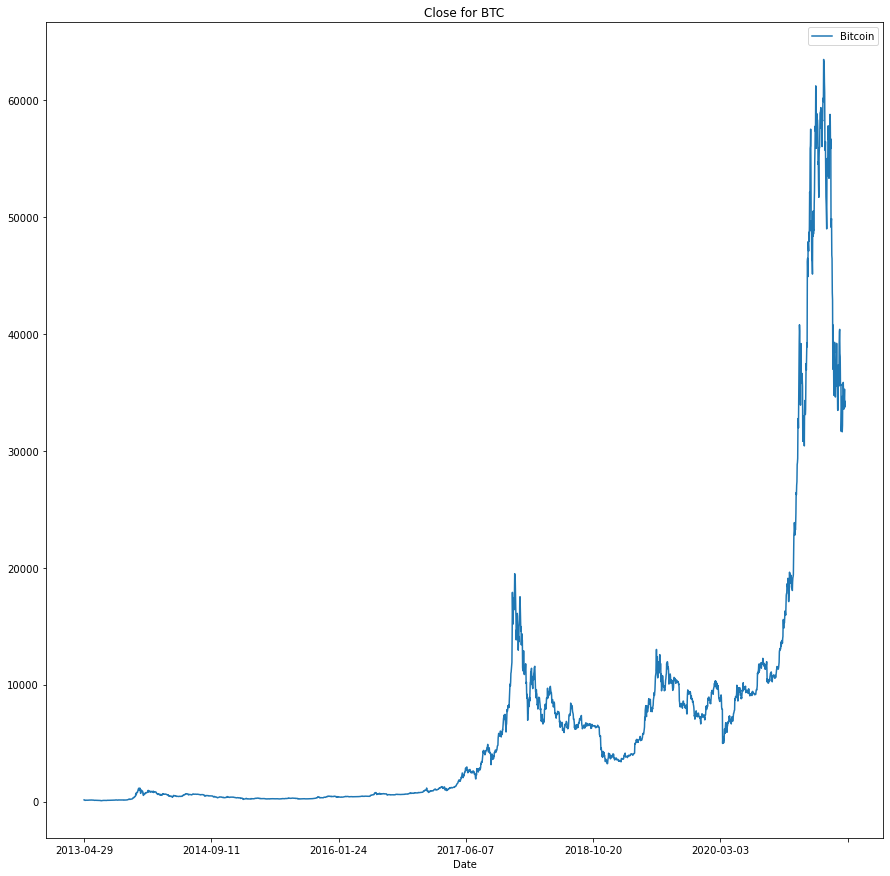

In [6]:
# Plot Close Price for Bitcoin
fig, ax = plt.subplots(figsize=(8,6))
for group,frame in btc_market_info.groupby(['Name']):
    frame['Close'].plot(figsize=(15,15),title='Close for BTC',ax=ax,label=group)
plt.legend()

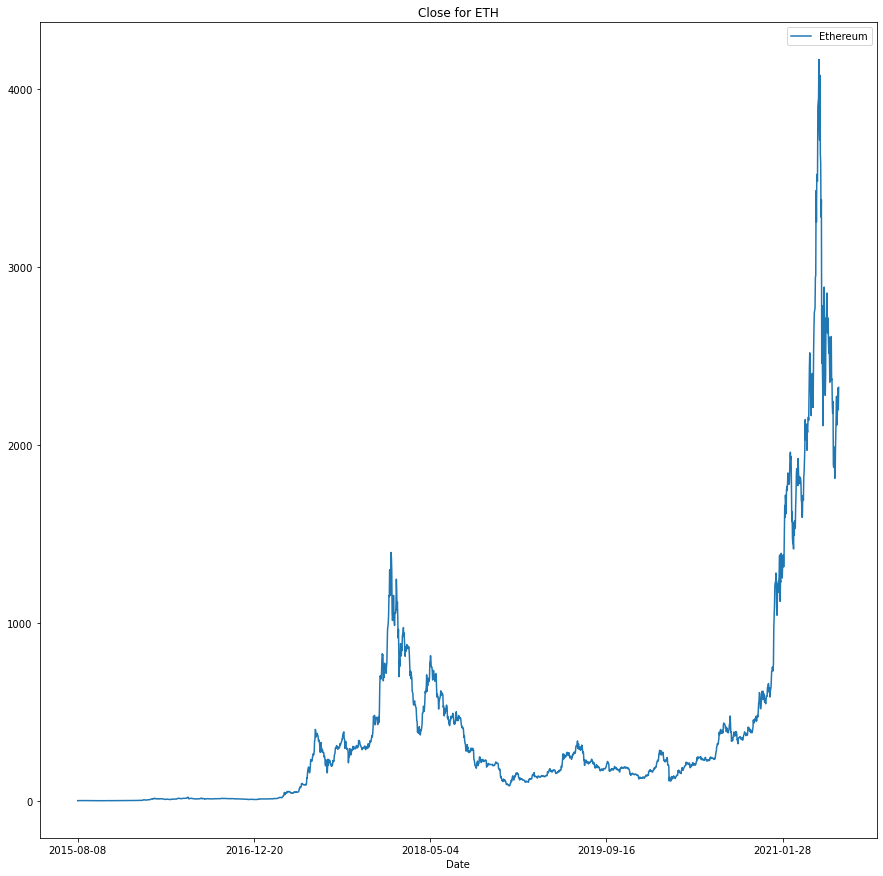

In [7]:
# Plot Close Price for ETH
fig, ax = plt.subplots(figsize=(8,6))
for group,frame in eth_market_info.groupby(['Name']):
    frame['Close'].plot(figsize=(15,15),title='Close for ETH',ax=ax,label=group)
plt.legend()

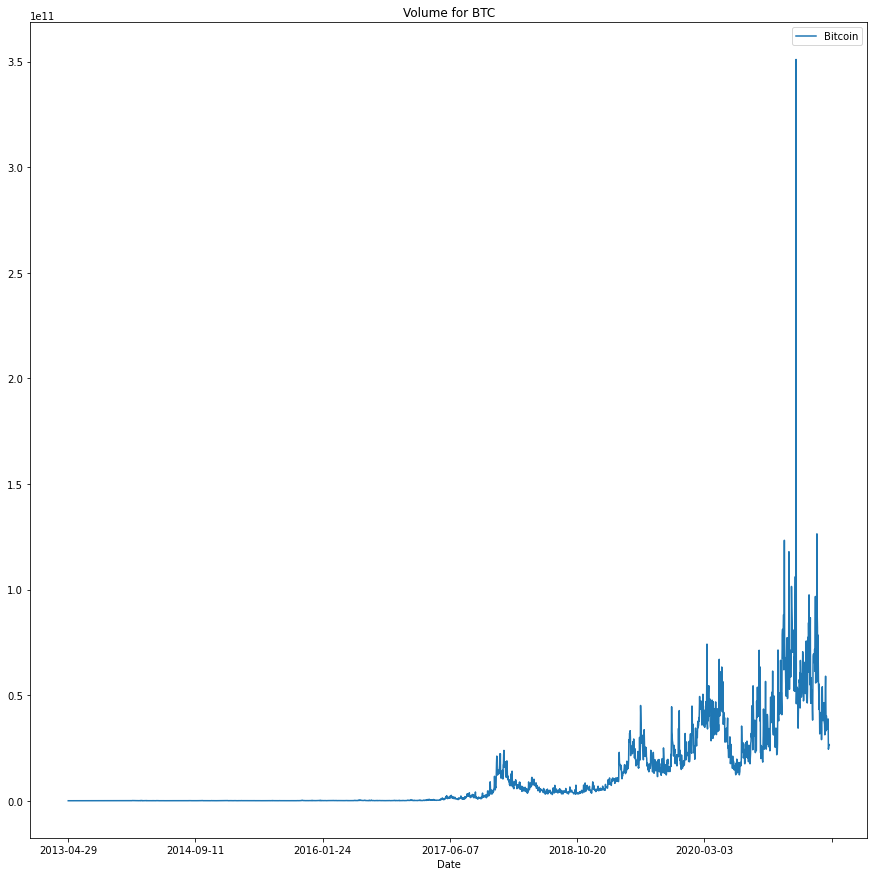

In [8]:
# Volume for BTC
fig, ax = plt.subplots(figsize=(8,6))
for group,frame in btc_market_info.groupby(['Name']):
    frame['Volume'].plot(figsize=(15,15),title='Volume for BTC',ax=ax,label=group)
plt.legend()

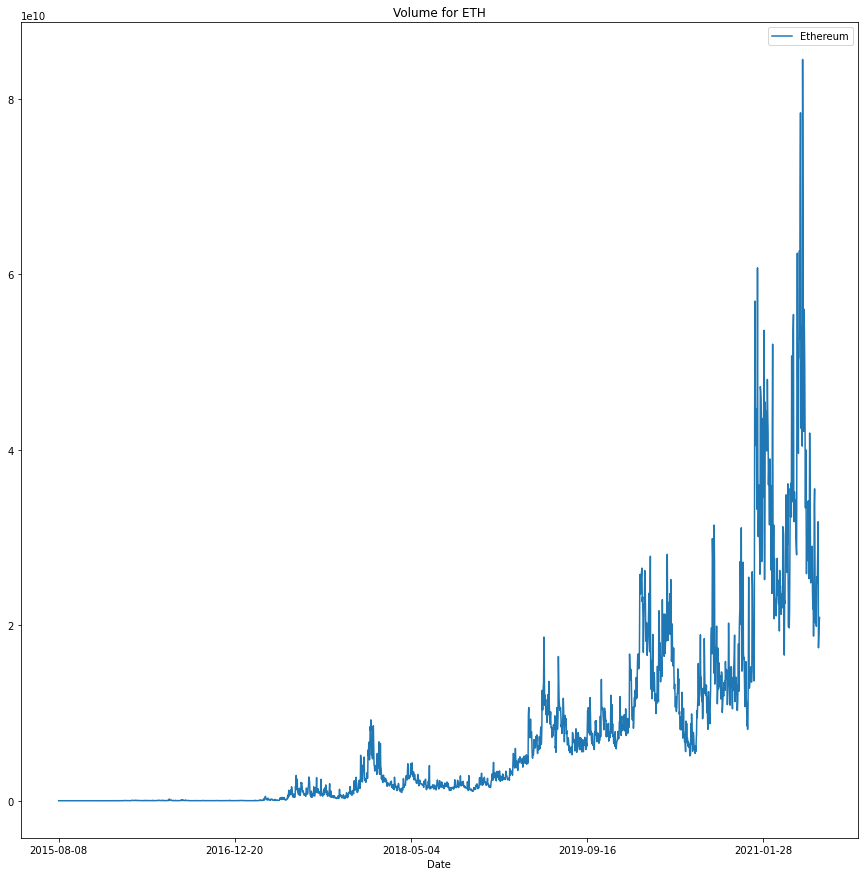

In [9]:
# Volume for ETH
fig, ax = plt.subplots(figsize=(8,6))
for group,frame in eth_market_info.groupby(['Name']):
    frame['Volume'].plot(figsize=(15,15),title='Volume for ETH',ax=ax,label=group)
plt.legend()

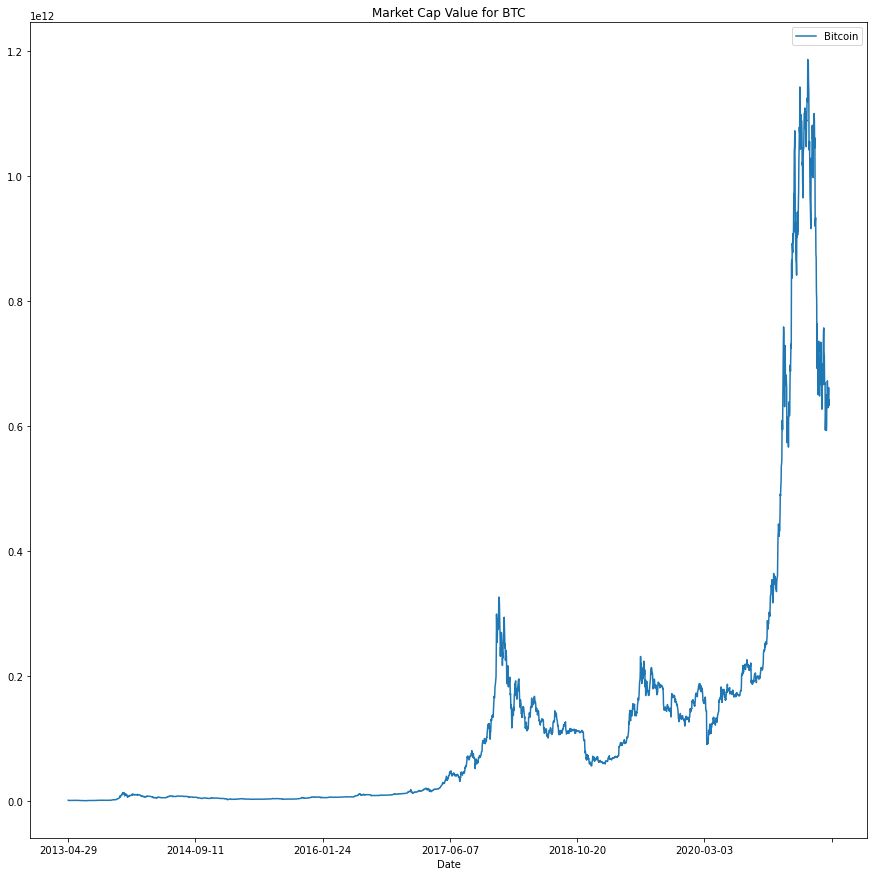

In [10]:
#Market Cap for BTC
fig, ax = plt.subplots(figsize=(8,6))
for group,frame in btc_market_info.groupby(['Name']):
    frame['Marketcap'].plot(figsize=(15,15),title='Market Cap Value for BTC',ax=ax,label=group)
plt.legend()

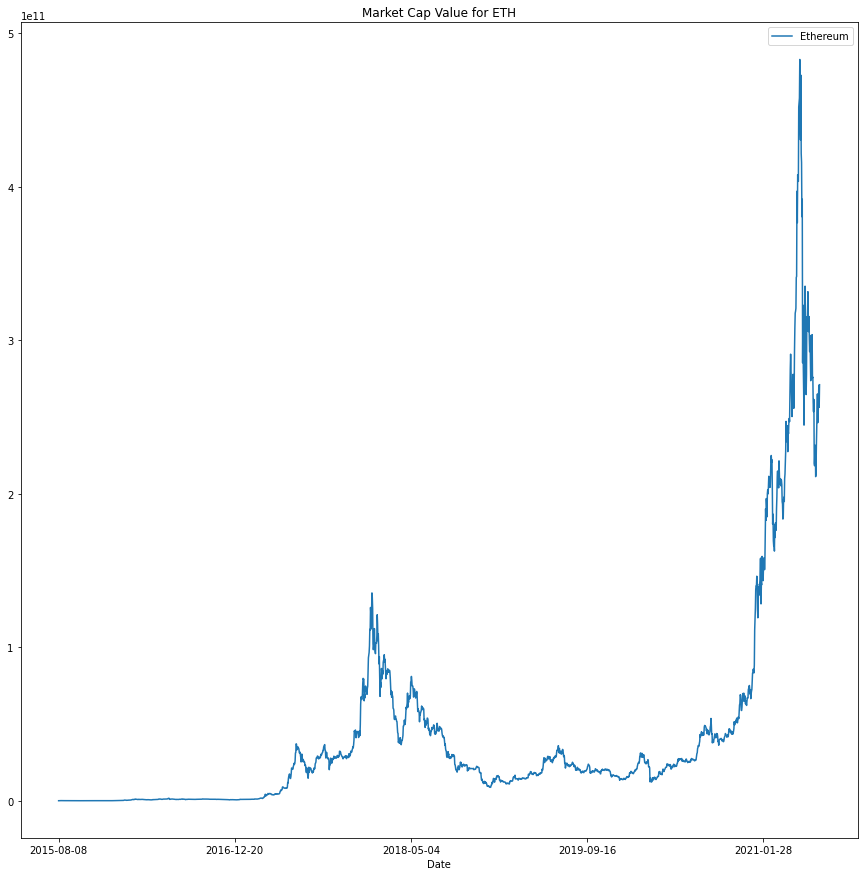

In [11]:
#Market Cap for ETH
fig, ax = plt.subplots(figsize=(8,6))
for group,frame in eth_market_info.groupby(['Name']):
    frame['Marketcap'].plot(figsize=(15,15),title='Market Cap Value for ETH',ax=ax,label=group)
plt.legend()

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

#Keeping only Adjusted Close (Close) as only this will be helpful in predicting stock prices
btc_market_info=btc_market_info[['Close']]
#Replacing NaN with 0
btc_market_info['Close'] = btc_market_info['Close'].fillna(0) 
#Declaring a forecast variable('n' days) to which forecast is to be made 'n' days into the future
forecast=30 #This means at a particular day I will be able to know the stock price after 30 days.
#Creating a Prediction Column which is a copy of Adj .Close but with 'forcast' number of rows shifted up
btc_market_info['Prediction']=btc_market_info[['Close']].shift(-forecast)
#Take a look at the new Data
print(btc_market_info.tail())

                   Close  Prediction
Date                                
2021-07-02  33897.048590         NaN
2021-07-03  34668.548402         NaN
2021-07-04  35287.779766         NaN
2021-07-05  33746.002456         NaN
2021-07-06  34235.193451         NaN


In [13]:
#Creating X and y independent and dependent variables respectively FOR BTC
X= np.array(btc_market_info.drop(['Prediction'],1))#Dropping the prediction Column
X=X[:-forecast] #Deleting the last 'n' rows
y=np.array(btc_market_info.drop(['Close'],1))#Dropping the Adj Close Column
y=y[:-forecast] #Deleting the last 'n' rows
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) #Split the data into train and test


In [14]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

In [15]:
lr=LinearRegression()

In [16]:
models=[lr]

In [17]:
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)  
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    print("RMSE : % f" %(rmse))

RMSE :  3105.026592


In [18]:
#Now when we have made the model now is the forecast time,so we use the last 'n' rows of the df
#creating X_forecast which will store the 'n' rows Adj .Close values
x_forecast=np.array(btc_market_info.drop(['Prediction'],1))
x_forecast=x_forecast[-forecast:]

In [19]:
#using X_forecast to make prediction for the 'n' days using the model created
LR_forecast=lr.predict(x_forecast)

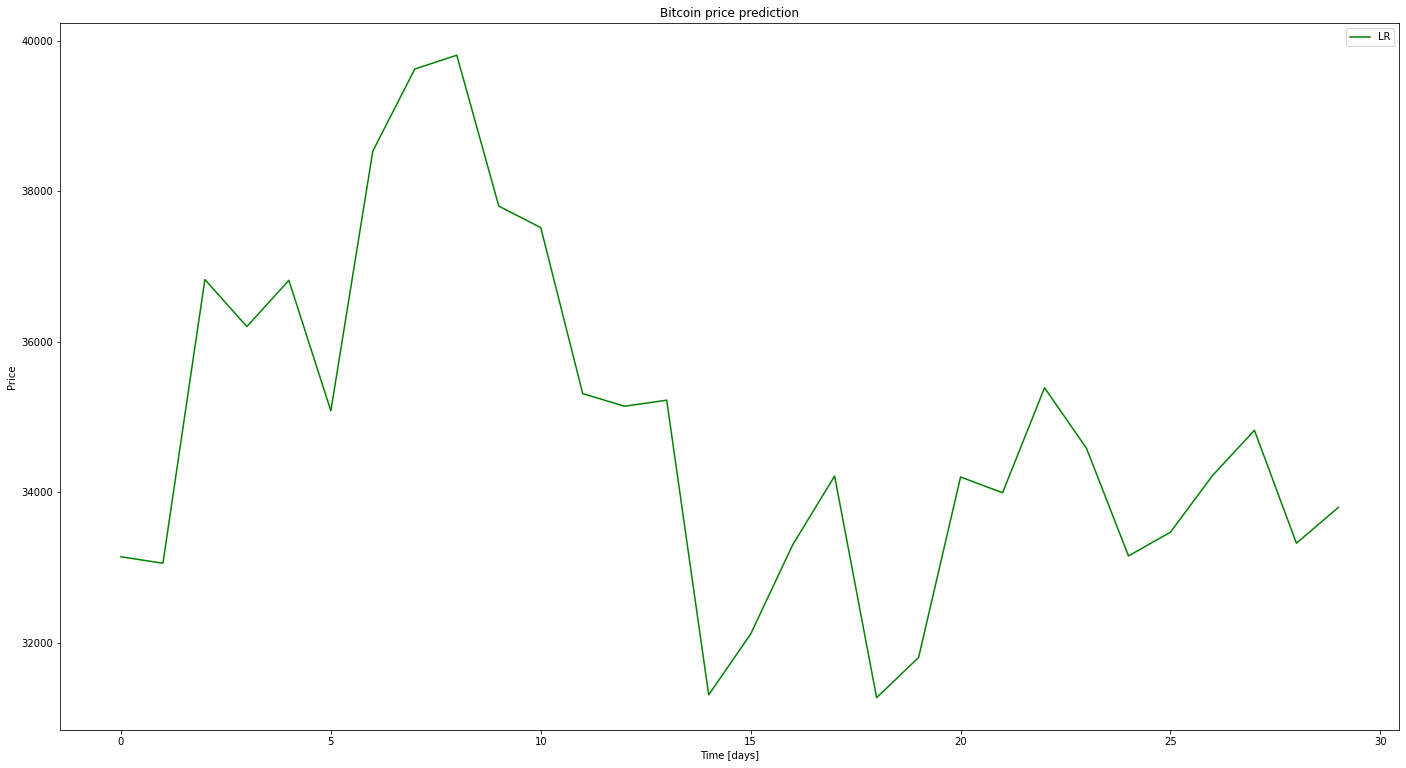

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24,13))
plt.plot(LR_forecast, label="LR", color='green')
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best') 
plt.show();

In [21]:
LR_forecast

array([[33142.61981443],
       [33056.90047305],
       [36825.76976647],
       [36200.44032204],
       [36815.33470504],
       [35081.13210424],
       [38531.60921092],
       [39622.24059958],
       [39805.00679423],
       [37800.90145559],
       [37515.19748225],
       [35309.57887345],
       [35142.78904376],
       [35223.01062305],
       [31309.01833587],
       [32115.80287516],
       [33300.59755043],
       [34214.8677273 ],
       [31271.14591457],
       [31804.9667793 ],
       [34202.41869222],
       [33992.87068476],
       [35387.95691882],
       [34583.14378355],
       [33153.72432431],
       [33469.96072883],
       [34220.81667647],
       [34823.47858971],
       [33322.95630198],
       [33799.05747834]])

In [22]:
bitcoin_prediction_df = pd.DataFrame(LR_forecast, columns = ['Bitcoin_Prediction_Price'])
bitcoin_prediction_df['Day'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
bitcoin_prediction_df = bitcoin_prediction_df[['Day', 'Bitcoin_Prediction_Price']]

In [23]:
bitcoin_prediction_df

,Day,Bitcoin_Prediction_Price
0,1,33142.619814
1,2,33056.900473
2,3,36825.769766
3,4,36200.440322
4,5,36815.334705
5,6,35081.132104
6,7,38531.609211
7,8,39622.240600
8,9,39805.006794
9,10,37800.901456


In [31]:
bitcoin_prediction_df.to_csv("Bitcoin_Prediction_30days.csv", index = False)

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split

#Keeping only Adjusted Close(Adj .Close) as only this will be helpful in predicting stock prices
eth_market_info=eth_market_info[['Close']]
#Replacing NaN with 0
eth_market_info['Close'] = eth_market_info['Close'].fillna(0) 
#Declaring a forecast variable('n' days) to which forecast is to be made 'n' days into the future
forecast=30 
eth_market_info['Prediction']=eth_market_info[['Close']].shift(-forecast)
#Take a look at the new Data
print(eth_market_info.tail())

                  Close  Prediction
Date                               
2021-07-02  2150.040364         NaN
2021-07-03  2226.114282         NaN
2021-07-04  2321.724112         NaN
2021-07-05  2198.582464         NaN
2021-07-06  2324.679449         NaN


In [25]:
#Creating X and y independent and dependent variables respectively FOR ETH
X1= np.array(eth_market_info.drop(['Prediction'],1))#Dropping the prediction Column
X1=X1[:-forecast] #Deleting the last 'n' rows
y1=np.array(eth_market_info.drop(['Close'],1))#Dropping the Adj Close Column
y1=y1[:-forecast] #Deleting the last 'n' rows
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2) #Split the data into train and test

In [26]:
lr=LinearRegression()

In [27]:
models=[lr]

In [28]:
for model in models:
    model.fit(X1_train,y1_train)
    pred = model.predict(X1_test)  
    rmse = np.sqrt(mean_squared_error(y1_test, pred))
    print("RMSE : % f" %(rmse))

RMSE :  236.695854


In [29]:
#Now when we have made the model now is the forecast time,so we use the last 'n' rows of the df
#creating X_forecast which will store the 'n' rows Adj .Close values
x1_forecast=np.array(eth_market_info.drop(['Prediction'],1))
x1_forecast=x1_forecast[-forecast:]

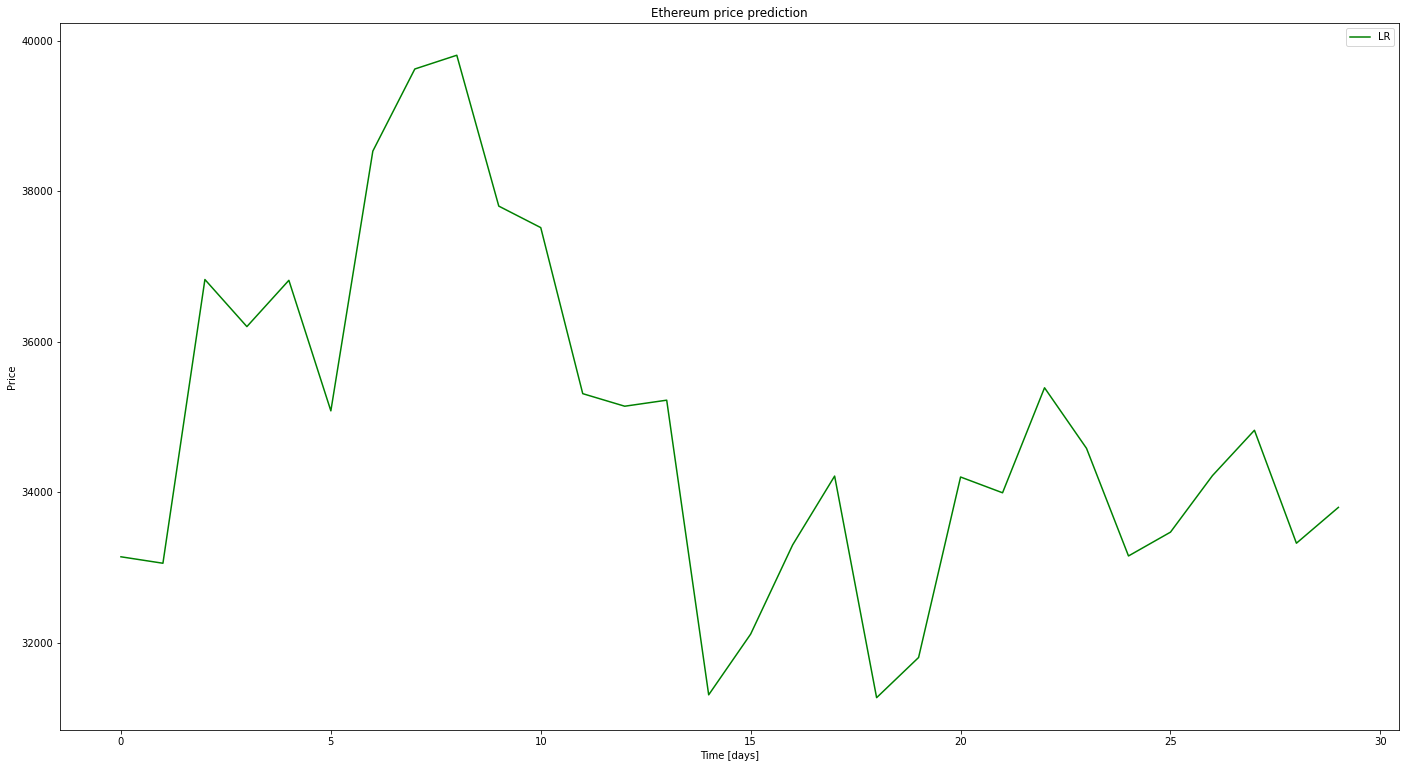

In [30]:
plt.figure(figsize=(24,13))
plt.plot(LR_forecast, label="LR", color='green')
plt.title('Ethereum price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best') 
plt.show();